## Prepare dataset

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
all_files = os.listdir("./data")
all_files = [f for f in all_files if f.endswith(".txt")]

all_files

['delivery_options.txt',
 'order_status_inquiry.txt',
 'payment_method.txt',
 'product_inquiry.txt']

In [3]:
all_files = [os.path.abspath(os.path.join("./data", f)) for f in all_files]

all_files

['d:\\Natural Language Processing\\Classification\\Roman Nepali Ecommerce Intent\\data\\delivery_options.txt',
 'd:\\Natural Language Processing\\Classification\\Roman Nepali Ecommerce Intent\\data\\order_status_inquiry.txt',
 'd:\\Natural Language Processing\\Classification\\Roman Nepali Ecommerce Intent\\data\\payment_method.txt',
 'd:\\Natural Language Processing\\Classification\\Roman Nepali Ecommerce Intent\\data\\product_inquiry.txt']

In [4]:
# prepare dataframe with the each line of text and the file name as intent and row as each line of text file

df = pd.DataFrame(columns=["intent", "text"])
data = []

for file in all_files:
    filename = os.path.basename(file).replace(".txt", "")
    with open(file, "r") as f:
        lines = f.readlines()
        
        for line in lines:
            data.append({"intent": filename, "text": line.strip()})

In [5]:
df = pd.DataFrame(data)

df.sample(10)

,intent,text
39,delivery_options,ma kati din paxi order gareko saman pauchu
56,order_status_inquiry,mero saman kaha aai pugyo jankari dinu
190,product_inquiry,kun kun product available cha store ma
15,delivery_options,order gareko kati din ma saman pauchu
199,product_inquiry,kun kun saman available cha
107,payment_method,payement method ke bata garne
111,payment_method,kasari payment garna milcha
150,product_inquiry,store ma kun product available cha
104,payment_method,payment method ke cha
113,payment_method,kasari pay garne ho


In [6]:
from torch.utils.data import Dataset, dataloader

In [7]:
df["text"].tolist()[:10], df["intent"].tolist()[:10]

(['delivery ko kasto kasto option cha',
  'delivery option ke kasto cha',
  'delivery kati din ma huncha',
  'order gareko kati din ma delivery huncha',
  'delivery kati din ma huncha',
  'maile order gareko kati din ma saman pauxu',
  'order garepaxi kati din ma saman aauxa',
  'order gareko kati din ma saman aauxa',
  'order garepaxi kati din ma saman pauxu',
  'saman deliver kasari huncha'],
 ['delivery_options',
  'delivery_options',
  'delivery_options',
  'delivery_options',
  'delivery_options',
  'delivery_options',
  'delivery_options',
  'delivery_options',
  'delivery_options',
  'delivery_options'])

In [8]:
import torch
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [9]:
class IntentDataset(Dataset):
    def __init__(self, df):
        self.X = df["text"].tolist()
        self.y = df["intent"].tolist()
        
        self.vectorizer = CountVectorizer()
        self.bow_features = self.vectorizer.fit_transform(self.X).toarray()
        
        self.label_encoder = LabelEncoder()
        self.labels = self.label_encoder.fit_transform(self.y)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        bow_features = torch.tensor(self.bow_features[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx], dtype=torch.long)
        return bow_features, label
    
    def get_labels(self):
        return self.y.unique()
    
    def bag_of_words(self, text):
        words = text.split()
        
    def get_vocab_size(self):
        return len(self.vectorizer.vocabulary_)
        
    def get_num_classes(self):
        return len(self.label_encoder.classes_)
    
    def label2id(self, label):
        classes =  self.label_encoder.classes_
        return classes[label]

In [10]:
dataset = IntentDataset(df)

In [11]:
dataset.label2id(2)

'payment_method'

In [12]:
len(dataset)

200

In [13]:
dataset.bow_features.shape

(200, 104)

In [14]:
dataset[80]

(tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 tensor(1))

In [15]:
train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True)

In [16]:
next(iter(train_dataloader))

[tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 

## Model Architecture

In [17]:
class NeuralNet(torch.nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.layer_1 = torch.nn.Linear(in_features=input_size, out_features=hidden_size)
        self.layer_2 = torch.nn.Linear(in_features=hidden_size, out_features=hidden_size)
        self.layer_3 = torch.nn.Linear(in_features=hidden_size, out_features=num_classes)
        self.relu = torch.nn.ReLU()
        
    def forward(self, X):
        out = self.relu(self.layer_1(X))
        out = self.relu(self.layer_2(out))
        out = self.layer_3(out)
        return out

In [18]:
# HyperParameters
input_size = dataset.get_vocab_size() # 104
batch_size = 8
hidden_size = 20
num_classes = dataset.get_num_classes() # 4
learning_rate = 0.001
num_epochs = 50

In [19]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [20]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Training Loop

In [21]:
model

NeuralNet(
  (layer_1): Linear(in_features=104, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=4, bias=True)
  (relu): ReLU()
)

In [22]:
a = []
a.append(1)
a.append(3)
a

[1, 3]

In [23]:
loss_tracking = []

for epoch in range(num_epochs):
    loss_per_epoch = 0
    for i, (bow_features, labels) in enumerate(train_dataloader):
        logits = model(bow_features)
        loss = criterion(logits, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_per_epoch += loss.item()
              
    loss_tracking.append(loss_per_epoch)  
    if (epoch+1) % 10 == 0:
        print(f"Epoch: {epoch + 1} , Loss: {loss}")
        
print(f"Final Loss: {loss}")

Epoch: 10 , Loss: 0.06774208694696426
Epoch: 20 , Loss: 0.017255516722798347
Epoch: 30 , Loss: 0.004969815257936716
Epoch: 40 , Loss: 0.0011227927170693874
Epoch: 50 , Loss: 0.0007642189739271998
Final Loss: 0.0007642189739271998


## Plot the result

In [24]:
model.eval()

NeuralNet(
  (layer_1): Linear(in_features=104, out_features=20, bias=True)
  (layer_2): Linear(in_features=20, out_features=20, bias=True)
  (layer_3): Linear(in_features=20, out_features=4, bias=True)
  (relu): ReLU()
)

In [25]:
len(loss_tracking)

50

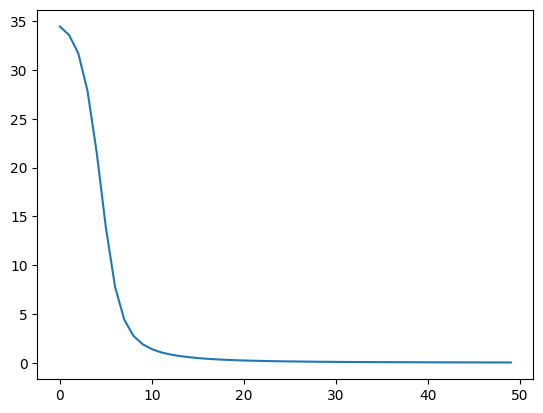

In [26]:
import matplotlib.pyplot as plt

epochs_range = np.arange(num_epochs)

plt.plot(epochs_range, loss_tracking)

## Testing the model

In [27]:
sentence = "payment method k k available cha"

In [28]:
bow_sentence = dataset.vectorizer.transform([sentence]).toarray()
bow_sentence

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [29]:
bow_tensor = torch.tensor(bow_sentence, dtype=torch.float32)
bow_tensor

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [30]:
model.eval()

logits = model(bow_tensor)
logits.shape

torch.Size([1, 4])

In [31]:
logits

tensor([[-3.2862, -4.4526,  2.4113, -1.6199]], grad_fn=<AddmmBackward0>)

In [32]:
preds_probability = torch.softmax(logits, dim=-1)
preds_probability.sum(dim=1)

tensor([1.], grad_fn=<SumBackward1>)

In [33]:
pred_label = torch.argmax(preds_probability, dim=-1)
pred_label

tensor([2])

In [34]:
dataset.label2id(pred_label)

'payment_method'

## All in One

In [35]:
def get_intent(sentence):
    bow_sentence = dataset.vectorizer.transform([sentence]).toarray()
    bow_tensor = torch.tensor(bow_sentence, dtype=torch.float32)
    with torch.no_grad():
        logits = model(bow_tensor)
        preds = torch.softmax(logits, dim=-1)
        preds_label = torch.argmax(preds, dim=-1)
    
    predicted_intent = dataset.label2id(preds_label)
    
    return f"The text: {sentence} is: {predicted_intent}"

In [36]:
get_intent("payment method k k ho")

'The text: payment method k k ho is: payment_method'

In [37]:
test_sentences = [
    "delivery options k k available cha",
    "payment kasari garne",
    "store ma k available cha",
    "mero order track garidinu"
]

In [38]:
for sentence in test_sentences:
    result = get_intent(sentence)
    print(result)

The text: delivery options k k available cha is: delivery_options
The text: payment kasari garne is: payment_method
The text: store ma k available cha is: product_inquiry
The text: mero order track garidinu is: order_status_inquiry
